## 모델을 만들어 간단한 훈련을 시켜보자

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense

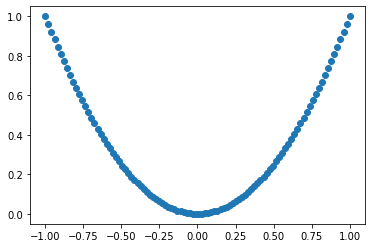

In [9]:
x = np.linspace(-1, 1, 100)
y = x**2
plt.scatter(x, y)

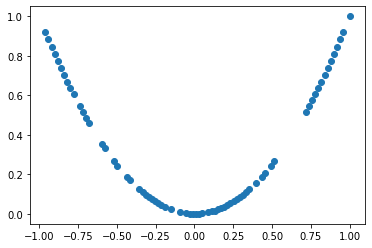

In [10]:
np.random.shuffle(x)
plt.scatter(x[:70], x[:70]**2)

In [11]:
model = Sequential()
model.add(Input(1))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='SGD', loss='mse', metrics = 'mse')

In [12]:
model.fit(x[:70], x[:70]**2, epochs = 100, verbose = 0, batch_size=16)

In [13]:
preds = model.predict(x[70:])
np.sum(abs(preds - x[70:]**2))

1/1 [==============================] - 0s 100ms/step


244.93074698554847

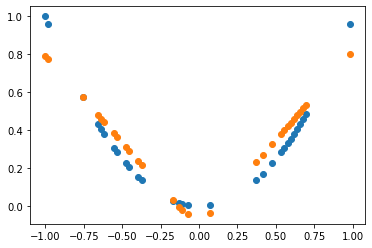

In [14]:
plt.scatter(x[70:], x[70:]**2)
plt.scatter(x[70:], preds)

## 훈련된 모델이 얼추 비슷하게 정답을 내고 있으나 정확하지 않아보인다. <br>
epochs를 늘려 훈련을 더 많이 시켜보자<br>
100 -> 1000

In [15]:
model.fit(x[:70], x[:70]**2, epochs = 1000, verbose = 0, batch_size=16)
preds = model.predict(x[70:])

1/1 [==============================] - 0s 17ms/step


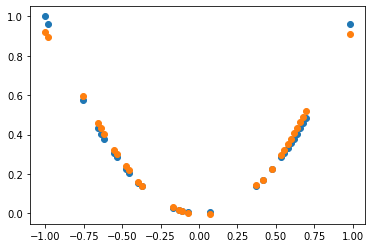

In [16]:
plt.scatter(x[70:], x[70:]**2)
plt.scatter(x[70:], preds)

## epochs의 값이 100일때보다 1000일 때 보다 정답에 더 가까워졌다.<br>
이번에는 train data의 수를 변경해보려한다.<br>
5 -> 80

In [17]:
# 모델은 위와 동일
model = Sequential()
model.add(Input(1))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='SGD', loss='mse', metrics = 'mse')

In [18]:
x = np.linspace(-1, 1, 100)
np.random.shuffle(x)

3/3 [==============================] - 0s 3ms/step


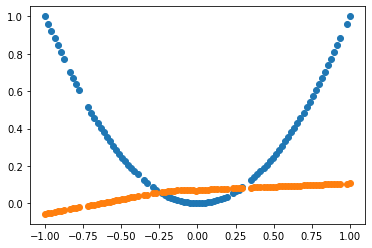

In [19]:
n = 10
model.fit(x[:n], x[:n]**2, epochs = 10, verbose = 0, batch_size=16)
preds = model.predict(x[n:])

plt.scatter(x[n:], x[n:]**2)
plt.scatter(x[n:], preds)

1/1 [==============================] - 0s 31ms/step


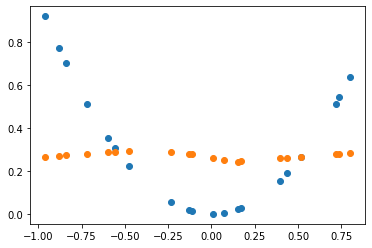

In [20]:
n = 80
model.fit(x[:n], x[:n]**2, epochs = 10, verbose = 0, batch_size=16)
preds = model.predict(x[n:])
plt.scatter(x[n:], x[n:]**2)
plt.scatter(x[n:], preds)

## train data의 변화는 유의미한 결과를 도출하지 못한것으로 보인다<br>
그래도 조금은.. 더 맞게 나온듯<br>
이번에는 모델의 활성화 함수(activation) 값을 다른 걸로 줘보자

### ReLU 함수

In [21]:
x = np.linspace(-1, 1, 100)
np.random.shuffle(x)
n = 70

In [22]:
model_r = Sequential()
model_r.add(Input(1))
model_r.add(Dense(10, activation='relu'))
model_r.add(Dense(10, activation='relu'))
model_r.add(Dense(units=1))

model_r.compile(optimizer='SGD', loss='mse', metrics = 'mse')

1/1 [==============================] - 0s 53ms/step


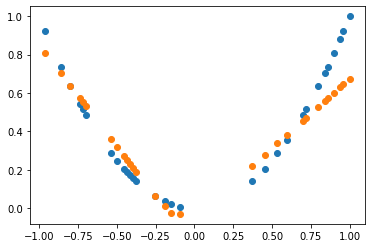

In [23]:
model_r.fit(x[:n], x[:n]**2, epochs = 350, verbose = 0, batch_size = 32)
preds = model_r.predict(x[n:])

plt.scatter(x[n:], x[n:]**2)
plt.scatter(x[n:], preds)

### Tanh 함수

In [24]:
model_t = Sequential()
model_t.add(Input(1))
model_t.add(Dense(10, activation='tanh'))
model_t.add(Dense(10, activation='tanh'))
model_t.add(Dense(units=1))

model_t.compile(optimizer='SGD', loss='mse', metrics = 'mse')

1/1 [==============================] - 0s 58ms/step


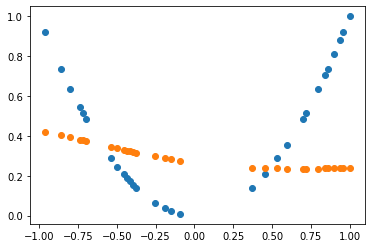

In [25]:
model_t.fit(x[:n], x[:n]**2, epochs = 350, verbose = 0, batch_size = 32)
preds = model_t.predict(x[n:])

plt.scatter(x[n:], x[n:]**2)
plt.scatter(x[n:], preds)

### Sigmoid 함수

In [26]:
model_s = Sequential()
model_s.add(Input(1))
model_s.add(Dense(10, activation='sigmoid'))
model_s.add(Dense(10, activation='sigmoid'))
model_s.add(Dense(units=1))

model_s.compile(optimizer='SGD', loss='mse', metrics = 'mse')

1/1 [==============================] - 0s 56ms/step


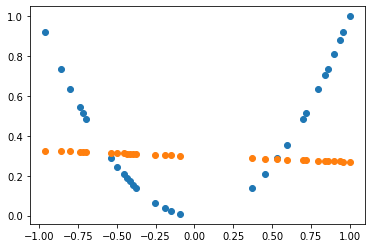

In [27]:
model_s.fit(x[:n], x[:n]**2, epochs = 350, verbose = 0, batch_size = 32)
preds = model_s.predict(x[n:])

plt.scatter(x[n:], x[n:]**2)
plt.scatter(x[n:], preds)

## MINIST
흑백 손글씨 숫자 이미지(28*28 픽셀)을 10개의 범주로 분류해보자.

In [28]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [29]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

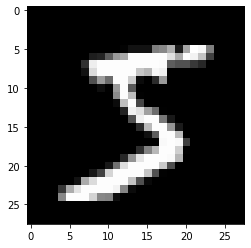

In [30]:
# 모양 확인
# print(train_images[0])

# 크기 확인
# train_images.shape
# (60000, 28, 28)

# 이미지로 확인
import matplotlib.pylab as plt
plt.imshow(train_images[0], cmap="gray")

### 신경망의 핵심구성 요소 : 층(layer)
- 데이터를 위한 필터(filter) 로 생각해볼 수 있다. 어떤
데이터가 들어가면 더 유용한 형태로 출력된다.
- 주어진 문제에 더 의미있는 표현(representation)을 입력된 데이터로부터 추출한다.

In [31]:
from keras.layers import Dense

model = Sequential([
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

### 컴파일 단계에 포함될 세가지
- 옵티마이저(optimizer) : 성능을 향상시키기 위해 입력된 데이터를 기반으로 모델을 업데이트 하는 메커니즘
- 손실 함수(loss function) : 훈련 데이터에서 모델의 성능을 측정하는 방법으로 모델이 옳은 방향으로 학습될 수 있도록 도와준다

In [32]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [34]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 6s 15ms/step - loss: 0.2883 - accuracy: 0.9169 - val_loss: 0.1440 - val_accuracy: 0.9585
Epoch 2/5
375/375 [==============================] - 5s 14ms/step - loss: 0.1198 - accuracy: 0.9638 - val_loss: 0.1078 - val_accuracy: 0.9680
Epoch 3/5
375/375 [==============================] - 8s 22ms/step - loss: 0.0778 - accuracy: 0.9770 - val_loss: 0.0875 - val_accuracy: 0.9753
Epoch 4/5
375/375 [==============================] - 8s 22ms/step - loss: 0.0552 - accuracy: 0.9834 - val_loss: 0.0840 - val_accuracy: 0.9754
Epoch 5/5
375/375 [==============================] - 6s 15ms/step - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0833 - val_accuracy: 0.9772


In [35]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 48ms/step


In [36]:
# 출력된 배열의 인덱스 i에 있는 숫자는 이미지 test_digits[0]이 클래스 i에 속할 확률에 해당하는 것이다.
predictions[0]

array([4.8424724e-08, 1.1483467e-08, 4.0505296e-05, 2.4363956e-04,
       9.0092343e-12, 1.1977146e-07, 3.1138599e-11, 9.9971271e-01,
       3.2434349e-07, 2.7935382e-06], dtype=float32)

In [37]:
# 최대값이 있는 위치 반환
predictions[0].argmax()

7

In [38]:
# 첫번째 테스트 숫자 중 최대값을 가진 인덱스 7번의 확률값
predictions[0][7]

0.9997127

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도 : {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0737 - accuracy: 0.9783
테스트 정확도 : 0.9782999753952026


In [40]:
def his_graph(history, epoch):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epoch)

  plt.figure(figsize=(8, 8))
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

  plt.show()

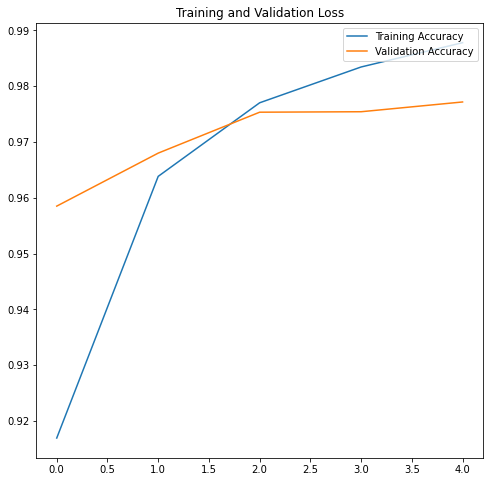

In [41]:
his_graph(history, 5)